In [1]:
import math 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = fetch_california_housing()
dataset = pd.DataFrame(housing.data,columns = housing.feature_names)

In [3]:
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
dataset["target"] = housing.target
dataset["Population"]

0         322.0
1        2401.0
2         496.0
3         558.0
4         565.0
          ...  
20635     845.0
20636     356.0
20637    1007.0
20638     741.0
20639    1387.0
Name: Population, Length: 20640, dtype: float64

In [5]:
X,Y= dataset["Population"].values.reshape(-1,1),dataset["target"].values.reshape(-1,1)

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

In [7]:
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [8]:
def predictValues(X):
    res = regression.coef_.item()*X+regression.intercept_.item()
    return res

In [9]:
def standard_deviation(data,bias=0):
  x= data
  observations = float(len(data))
  std_dev = np.sqrt(np.sum((x-np.mean(x))**2)/observations-min(bias,1))
  return std_dev

In [10]:
from scipy.stats import norm
import numpy as np
def normal_distribution(X):
    plt.hist(X,bins=50,density=True,color='c')
    xmin,xmax=plt.xlim()
    rng = np.linspace(xmin,xmax,len(X))
    sigma=standard_deviation(X)
    norm_pdf= norm.pdf(rng,X.mean(),sigma)
    plt.plot(rng,norm_pdf,'k',linewidth = 2)
    return plt.grid()
    

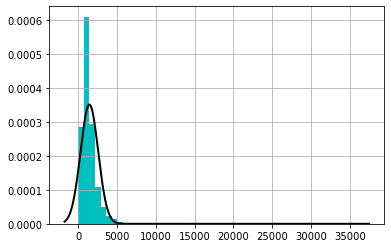

In [11]:
normal_distribution(X_train)

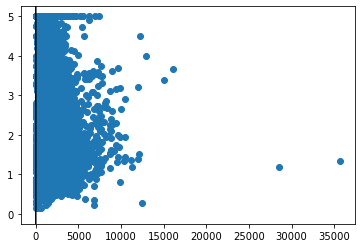

In [13]:

plt.scatter(X_train,Y_train)
plt.axline(xy1=(0,regression.coef_.item()),slope = regression.intercept_.item(),color='k')